In [ ]:
! pip install -r requirements.txt

In [67]:
from config import TRAIN_PATH, VALID_PATH

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import json
import os

from pprint import pprint

In [121]:
def flatten(something):
    if isinstance(something, (list, tuple, set, range)):
        for sub in something:
            yield from flatten(sub)
    else:
        yield something

def get_unique_colors(data, skip_zero=True):
    colors, counts = np.unique(list(flatten(data)), return_counts=True)

    no_colors = sum(counts)
    color_counts = {color: 0 for color in range(0,10)}
    for i, color in enumerate(colors):
        if skip_zero and i == 0:
            continue
        color_counts[color] = counts[i] 

    return (no_colors, color_counts)

def get_dimensions(task):
    x = len(task)
    y = len(task[0]) if x > 0 else 0
    return (x, y)

In [173]:

def plot_examples(data_path, idx_list):
    training_tasks = sorted(os.listdir(data_path))
    for i in idx_list:
        task_file = str(data_path / training_tasks[i])
        with open(task_file, 'r') as f:
            task = json.load(f)
        cmap = colors.ListedColormap(
            ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
            '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
        norm = colors.Normalize(vmin=0, vmax=9)
        fig, axs = plt.subplots(1, 4, figsize=(15,15))
        axs[0].imshow(task['train'][0]['input'], cmap=cmap, norm=norm)
        axs[0].axis('off')
        axs[0].set_title('Train Input')
        axs[1].imshow(task['train'][0]['output'], cmap=cmap, norm=norm)
        axs[1].axis('off')
        axs[1].set_title('Train Output')
        axs[2].imshow(task['test'][0]['input'], cmap=cmap, norm=norm)
        axs[2].axis('off')
        axs[2].set_title('Test Input')
        axs[3].imshow(task['test'][0]['output'], cmap=cmap, norm=norm)
        axs[3].axis('off')
        axs[3].set_title('Test Output')
        plt.tight_layout()
        plt.show()

def plot_unique_colors(data_path, *, idx_list = None, skip_zero = True):
    GRAPH_TYPES = {
        'train-in': 'Train Inputs',
        'train-out': 'Train Outputs',
        'test-in': 'Test Inputs',
        'test-out': 'Test Outputs',
        'overall': 'Overall',
    }
    color_counts = {}
    no_colors = {}
    for t in GRAPH_TYPES:
        color_counts[t] = 10 * [0] # {color: 0 for color in range(0,10)}
        no_colors[t] = 0

    training_tasks = sorted(os.listdir(data_path))
    if not idx_list:
        idx_list = list(range(len(training_tasks)))

    for i in idx_list:
        task_file = str(data_path / training_tasks[i])
        with open(task_file, 'r') as f:
            task = json.load(f)

            no_color_tri, color_count_tri = get_unique_colors(
                [ v['input'] for v in task['train'] ],
                skip_zero=skip_zero
            )
            no_color_tro, color_count_tro = get_unique_colors(
                [ v['output'] for v in task['train'] ],
                skip_zero=skip_zero
            )
            no_color_tei, color_count_tei = get_unique_colors(
                [ v['input'] for v in task['test'] ],
                skip_zero=skip_zero
            )
            no_color_teo, color_count_teo = get_unique_colors(
                [ v['output'] for v in task['test'] ],
                skip_zero=skip_zero
            )

            no_colors['train-in'] += no_color_tri
            no_colors['train-out'] += no_color_tro
            no_colors['test-in'] += no_color_tei
            no_colors['test-out'] += no_color_teo

            for k, v in color_count_tri.items(): 
                color_counts['train-in'][k] += v
                color_counts['overall'][k] += v
            for k, v in color_count_tro.items(): 
                color_counts['train-out'][k] += v
                color_counts['overall'][k] += v
            for k, v in color_count_tei.items(): 
                color_counts['test-in'][k] += v
                color_counts['overall'][k] += v
            for k, v in color_count_teo.items(): 
                color_counts['test-out'][k] += v
                color_counts['overall'][k] += v

    # Show a histogram of our used colors
    colorvs = ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00', '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25']
    fig, axs = plt.subplots(1, len(GRAPH_TYPES))
    for i, (color, title) in enumerate(GRAPH_TYPES.items()):
        _,_,patches = axs[i].hist(list(range(10)), weights=color_counts[color])
        for idx, p in enumerate(patches): p.set_facecolor(colorvs[idx])
        axs[i].set_title(title)

    plt.tight_layout()
    plt.show()


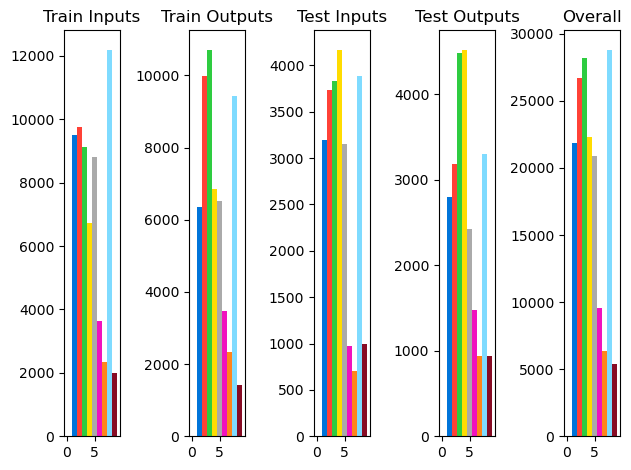

In [174]:
# plot_examples(TRAIN_PATH, [0])
plot_unique_colors(TRAIN_PATH)